<a href="https://colab.research.google.com/github/syamjithz/Chatbot/blob/main/Chatbot_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input,Embedding,LSTM,Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [ ]:
%%writefile content.json
{"intents":
 [
   {
     "tag":"greeting",
     "input":["hello","hi there","nice to meet you","hi,is this the subhash office?","hi","hi there","hey","hey,there"],
     "responses":["hey there,welcome to NFC","hello","hi thanks for visiting","hi,how can i help you?","hey,what can i do for you?"]
       
   },
   {
     "tag":"goodbye",
     "input":["bye","see you later","goodbye"],
     "responses":["it was nice meeting you","bye,see you again","have a nice day"]
   },
   {
     "tag":"thanks",
     "input":["thanks","thank you","that was helpful","thanks alot"],
     "responses":["My pleasure","you are welcome","happy to help","any time"]
   },
   {
     "tag":"menu",
     "input":["do you have cheeseburgers","what is todays special","menu please","today's special?",""],
     "responses":["Yes, I have","All are special","Sure","it's cheeseburgers"]
   }
   
     
     
     
     
 ]
    
}

Overwriting content.json


In [ ]:
#importing the dataset
with open('content.json') as content:
  data1=json.load(content)

In [ ]:
# getting all the data to lists
tags=[]
inputs=[]
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])


In [ ]:
# Converting to a datafram
data=pd.DataFrame({"inputs":inputs,"tags":tags})
data

,inputs,tags
0,hello,greeting
1,hi there,greeting
2,nice to meet you,greeting
3,"hi,is this the subhash office?",greeting
4,hi,greeting
5,hi there,greeting
6,hey,greeting
7,"hey,there",greeting
8,bye,goodbye
9,see you later,goodbye


In [ ]:
data=data.sample(frac=1)

Pre-Processing

In [ ]:
#removing the punctuactions
import string
data['inputs']=data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs']=data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
4,hi,greeting
9,see you later,goodbye
8,bye,goodbye
13,that was helpful,thanks
18,todays special,menu
7,heythere,greeting
5,hi there,greeting
10,goodbye,goodbye
2,nice to meet you,greeting
17,menu please,menu


In [ ]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train=tokenizer.texts_to_sequences(data['inputs'])

#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train=pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(data['tags'])

In [ ]:
#tensorflow"s tokenizer assigns a unique token to each distinct word and padding is done to get all the data to the same length so as to send it to an rnn layer
input_shape=x_train.shape[1]
print(input_shape)

5


In [ ]:
#define vocabulary
vocabulary=len(tokenizer.word_index)
print("number of unique words:",vocabulary)
output_length=le.classes_.shape[0]
print("output length:",output_length)

number of unique words: 33
output length: 4


In [ ]:
#creating the model
i=Input(shape=(input_shape,))
x=Embedding(vocabulary+1,10)(i)
x=LSTM(10,return_sequences=True)(x)
x=Flatten()(x)
x=Dense(output_length,activation="softmax")(x)
model=Model(i,x)

In [ ]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [ ]:
#training the model
train=model.fit(x_train,y_train,epochs=200)

Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 1.3848 - accuracy: 0.2500
Epoch 2/200
1/1 [==============================] - 0s 23ms/step - loss: 1.3834 - accuracy: 0.2500
Epoch 3/200
1/1 [==============================] - 0s 23ms/step - loss: 1.3821 - accuracy: 0.2500
Epoch 4/200
1/1 [==============================] - 0s 19ms/step - loss: 1.3808 - accuracy: 0.3000
Epoch 5/200
1/1 [==============================] - 0s 18ms/step - loss: 1.3794 - accuracy: 0.3500
Epoch 6/200
1/1 [==============================] - 0s 23ms/step - loss: 1.3780 - accuracy: 0.5000
Epoch 7/200
1/1 [==============================] - 0s 21ms/step - loss: 1.3767 - accuracy: 0.5000
Epoch 8/200
1/1 [==============================] - 0s 15ms/step - loss: 1.3753 - accuracy: 0.4500
Epoch 9/200
1/1 [==============================] - 0s 19ms/step - loss: 1.3738 - accuracy: 0.5000
Epoch 10/200
1/1 [==============================] - 0s 15ms/step - loss: 1.3724 - accuracy: 0.5000
Epoch 11/200
1/1 [===

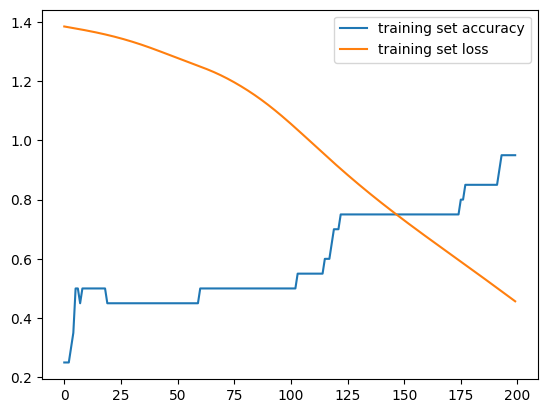

In [ ]:
#plotting the model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [30]:
#testing the model
import random
while True:
    texts_p=[]
    prediction_input=input('you:')
    
    #removing punctuation and converting to lowercase
    prediction_input=[letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input=''.join(prediction_input)
    texts_p.append(prediction_input)
    
    #tokenizing and padding
    prediction_input=tokenizer.texts_to_sequences(texts_p)
    prediction_input=np.array(prediction_input).reshape(-1)
    prediction_input=pad_sequences([prediction_input],input_shape)
    
    #getting output from model
    output=model.predict(prediction_input)
    output=output.argmax()
    
    #finding the right tag and predicting
    response_tag=le.inverse_transform([output])[0]
    print("Going Merry: ",random.choice(responses[response_tag]))
    if response_tag=="goodbye":
        break
    

you:hi
1/1 [==============================] - 0s 22ms/step
Going Merry:  hello
you:hii
1/1 [==============================] - 0s 22ms/step
Going Merry:  hi,how can i help you?
you:goodbye
1/1 [==============================] - 0s 33ms/step
Going Merry:  bye,see you again
